# Proyecto X - SQLeros

### Se crea ésta notebook en Colab
Incidencia BBT2-11

### Se clona repositorio de Alkemy (BBVA-BDS-W1-T2)

Incidencia BBT2-5

In [1]:
!git clone https://github.com/alkemyTech/BBVA-BDS-W1-T2.git

fatal: destination path 'BBVA-BDS-W1-T2' already exists and is not an empty directory.


### Se crea rama de trabajo individual (GIT)

Incidencia BBT2-8



# Sección SQLite

Importación SQL + Pandas

In [2]:
#Importamos SQlite
import sqlite3
#Importamos pandas
import pandas as pd

### Crear una base de datos de SQLite

Incidencia BBT2-14

In [3]:
# Conectar a la base de datos
conn = sqlite3.connect('ecommerce.db')
cursor = conn.cursor()

## Creación de Dataframes de pandas con asignación de rutas

In [4]:
#Creación de Dataframes de pandas con asignación de rutas
ecommerce_customers = pd.read_csv('/content/BBVA-BDS-W1-T2/datasets/Copia de ecommerce_customers_dataset.csv')
ecommerce_geolocation=pd.read_csv('/content/BBVA-BDS-W1-T2/datasets/Copia de ecommerce_geolocation_dataset.csv')
ecommerce_order_items=pd.read_csv('/content/BBVA-BDS-W1-T2/datasets/Copia de ecommerce_order_items_dataset.csv')
ecommerce_order_payments=pd.read_csv('/content/BBVA-BDS-W1-T2/datasets/Copia de ecommerce_order_payments_dataset.csv')
ecommerce_order_reviews=pd.read_csv('/content/BBVA-BDS-W1-T2/datasets/Copia de ecommerce_order_reviews_dataset.csv')
ecommerce_orders=pd.read_csv('/content/BBVA-BDS-W1-T2/datasets/Copia de ecommerce_orders_dataset.csv')
ecommerce_products = pd.read_csv('/content/BBVA-BDS-W1-T2/datasets/Copia de ecommerce_products_dataset.csv')
ecommerce_sellers=pd.read_csv('/content/BBVA-BDS-W1-T2/datasets/Copia de ecommerce_sellers_dataset.csv')
ecommerce_product_category_name_translation=pd.read_csv('/content/BBVA-BDS-W1-T2/datasets/Copia de product_category_name_translation.csv')





### Mostramos en lista las columnas de cada DF por visibilidad

In [5]:

ecommerce_customers.columns.tolist()

['customer_id',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state']

In [6]:
ecommerce_orders.columns.tolist()

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [7]:
ecommerce_order_payments.columns.tolist()

['order_id',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value']

In [8]:
ecommerce_geolocation.columns.tolist()

['geolocation_zip_code_prefix',
 'geolocation_lat',
 'geolocation_lng',
 'geolocation_city',
 'geolocation_state']

In [9]:
ecommerce_order_reviews.columns.tolist()

['review_id',
 'order_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp']

## Guardamos los DF como tablas en la BD

In [10]:
# Guardar los df como tablas en la base de datos ecommerce.db
ecommerce_customers.to_sql('customers', conn, if_exists='replace', index=False)
ecommerce_order_items.to_sql('order_items', conn, if_exists='replace', index=False)
ecommerce_order_payments.to_sql('order_payments', conn, if_exists='replace', index=False)
ecommerce_orders.to_sql('orders', conn, if_exists='replace', index=False)
ecommerce_products.to_sql('products', conn, if_exists='replace', index=False)
ecommerce_geolocation.to_sql('geolocation', conn, if_exists='replace', index=False)
ecommerce_order_reviews.to_sql('reviews', conn, if_exists='replace', index=False)
ecommerce_sellers.to_sql('sellers', conn, if_exists='replace', index=False)
ecommerce_product_category_name_translation.to_sql('product_category_name_translation', conn, if_exists='replace', index=False)


71

## Extracción de datos desde las tablas orders y payments

Incidencia BBT2-19

In [11]:
# Crear un DataFrame que contenga el JOIN de la tabla orders y tabla payments.
orders_and_payments = pd.read_sql_query('''
SELECT * FROM orders o
INNER JOIN order_payments op
ON o.order_id = op.order_id''', conn)

In [12]:
orders_and_payments.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,2,voucher,1,18.59
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,3,voucher,1,2.00


## Extracción de datos desde las tablas customers y geolocations

Incidencia BBT2-20

In [13]:
# Crear un DataFrame que contenga el JOIN de la tabla customers y tabla geolocation.
customers_and_geolocation = pd.read_sql_query('''
SELECT c.customer_unique_id,g.geolocation_city, g.geolocation_state, c.customer_zip_code_prefix as Zip_code, AVG(g.geolocation_lat) as Latitud, AVG(g.geolocation_lng) as Longitud
FROM customers c
JOIN geolocation g
ON g.geolocation_zip_code_prefix = c.customer_zip_code_prefix
GROUP BY customer_unique_id
ORDER BY g.geolocation_city
LIMIT 90000

''', conn)

#Código anterior
# SELECT distinct * FROM customers c
# INNER JOIN geolocation g
# ON c.customer_zip_code_prefix = g.geolocation_zip_code_prefix
# LIMIT 1000

In [14]:
customers_and_geolocation.head(3)

,customer_unique_id,geolocation_city,geolocation_state,Zip_code,Latitud,Longitud
0,64ee476500a01beb94df40f97a108c50,abadia dos dourados,MG,38540,-18.474476,-47.407837
1,afddf43a03a9941624ed42c0b2c17280,abadia dos dourados,MG,38540,-18.474476,-47.407837
2,e1feae9083c4c2895ddf6dc80526a85d,abadia dos dourados,MG,38540,-18.474476,-47.407837


## Extracción de datos desde las tablas orders y geolocations

Incidencia BBT2-21

In [15]:
# Crear un DataFrame que contenga el JOIN de la tabla orders y tabla geolocation (necesita customers)

orders_and_geolocation = pd.read_sql_query('''
SELECT o.order_id,op.payment_value, o.order_purchase_timestamp as Time, o.customer_id, g.geolocation_city, g.geolocation_state,c.customer_zip_code_prefix as Zip_code, AVG(g.geolocation_lat) as Latitud, AVG(g.geolocation_lng) as Longitud
FROM orders o
JOIN order_payments op ON o.order_id = op.order_id
JOIN customers c ON o.customer_id = c.customer_id
JOIN geolocation g ON g.geolocation_zip_code_prefix = c.customer_zip_code_prefix
GROUP BY o.order_id
ORDER BY g.geolocation_city
LIMIT 90000
''', conn)


In [16]:
orders_and_geolocation.head(3)

,order_id,payment_value,Time,customer_id,geolocation_city,geolocation_state,Zip_code,Latitud,Longitud
0,0a9a43ac5fe59c6c4bee2a8f9b9fcce8,58.28,2018-07-02 08:00:35,f11eb8f0b8b87510a93e3e1aa10b0ade,abadia dos dourados,MG,38540,-18.474476,-47.407837
1,50ba38c4dc467baab1ea2c8c7747934d,219.63,2018-03-02 21:32:44,9e01f714a2b3b8962c222cf2b74c20dc,abadia dos dourados,MG,38540,-18.474476,-47.407837
2,d99e6849f7676dade195f20c26f0eb4f,135.59,2017-09-02 22:37:17,a23e3f9a2b656b23b7e52075964b42cd,abadia dos dourados,MG,38540,-18.474476,-47.407837


## Filtrar datos, reducir volumen de order y payments

Incidencia BBT2-29

In [17]:
#Filtrar el DataFrame de órdenes y pagos para resguardar los 3 pagos de mayor importe por cliente.
#No es eficiente la consulta en SQL, POR LO QUE LO PUDE HACER EN PANDAS
#DataFrame ordenado por 'customer_id' y 'payment_value'
df_ordenado = orders_and_payments.sort_values(by=['customer_id', 'payment_value'], ascending=[True, False])

#Groupby y head para tomar las primeras 3 filas de cada cliente
top_3_payments = df_ordenado.groupby('customer_id').head(3).reset_index(drop=True)



In [18]:
top_3_payments.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04 00:00:00,5f79b5b0931d63f1a42989eb65b9da6e,1,credit_card,8,114.74
1,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04 00:00:00,a44895d095d7e0702b6a162fa2dbeced,1,credit_card,5,67.41
2,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22 00:00:00,316a104623542e4d75189bb372bc5f8d,1,credit_card,10,195.42


BBT2-25 - (FRAN) QUIERO: Filtrar el DataFrame de clientes y órdenes para resguardar las 3 órdenes más actuales de cada cliente.PARA: Reducir el volumen de datos y trabajar solo con las últimas órdenes de los clientes

In [19]:
# Crear un DataFrame que contenga el JOIN de la tabla customers y orders.
clients_and_orders = pd.read_sql_query('''
SELECT  c.customer_id, o.order_id, o.order_purchase_timestamp
FROM customers c
INNER JOIN orders o
ON c.customer_id = o.customer_id
''', conn)

In [20]:
#Filtrar el DataFrame de clientes y órdenes para resguardar las 3 órdenes más actuales de cada cliente.
#No es eficiente la consulta en SQL, POR LO QUE LO PUDE HACER EN PANDAS

#Primero,  transformamos de string a fecha la columna con la fecha de orden
clients_and_orders['order_purchase_timestamp'] = pd.to_datetime(clients_and_orders['order_purchase_timestamp'])


# Ordena el DataFrame por 'customer_id' y 'order_purchase_timestamp' en orden desc
df2_ordenado = clients_and_orders.sort_values(by=['customer_id', 'order_purchase_timestamp'], ascending=[True, False])

# Usamos groupby y head para tomar las primeras 3 filas de cada grupo (cliente)
top_3_orders = df2_ordenado.groupby('customer_id').head(3).reset_index(drop=True)


top_3_orders


,customer_id,order_id,order_purchase_timestamp
0,00012a2ce6f8dcda20d059ce98491703,5f79b5b0931d63f1a42989eb65b9da6e,2017-11-14 16:08:26
1,000161a058600d5901f007fab4c27140,a44895d095d7e0702b6a162fa2dbeced,2017-07-16 09:40:32
2,0001fd6190edaaf884bcaf3d49edf079,316a104623542e4d75189bb372bc5f8d,2017-02-28 11:06:43
3,0002414f95344307404f0ace7a26f1d5,5825ce2e88d5346438686b0bba99e5ee,2017-08-16 13:09:20
4,000379cdec625522490c315e70c7a9fb,0ab7fb08086d4af9141453c91878ed7a,2018-04-02 13:42:17
...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,814d6a3a7c0b32b2ad929ac6328124e9,2018-03-29 16:59:26
99437,fffeda5b6d849fbd39689bb92087f431,8c855550908247a7eff50281b92167a8,2018-05-22 13:36:02
99438,ffff42319e9b2d713724ae527742af25,83b5fc912b2862c5046555ded1483ae9,2018-06-13 16:57:05
99439,ffffa3172527f765de70084a7e53aae8,d0e7be325a1c986babc4e1cdb91edc03,2017-09-02 11:53:32


## Filtrar datos, reducir volumen de customers y geolocations

Incidencia BBT2-30

In [21]:
# Filtrar el DataFrame de clientes para resguardar los últimos 30 clientes de cada ciudad.

# Ordenar el DataFrame original por 'customer_city', 'Latitud' y 'Longitud'
sorted= customers_and_geolocation.sort_values(by=['geolocation_city', 'Latitud', 'Longitud'], ascending=[True, False, False])

# Agrupar por 'customer_city' y tomar los últimos 30 registros de cada grupo
last_30_cust_city = sorted.groupby('geolocation_city').tail(30).reset_index(drop=True)



In [22]:
last_30_cust_city.head(3)

,customer_unique_id,geolocation_city,geolocation_state,Zip_code,Latitud,Longitud
0,64ee476500a01beb94df40f97a108c50,abadia dos dourados,MG,38540,-18.474476,-47.407837
1,afddf43a03a9941624ed42c0b2c17280,abadia dos dourados,MG,38540,-18.474476,-47.407837
2,e1feae9083c4c2895ddf6dc80526a85d,abadia dos dourados,MG,38540,-18.474476,-47.407837


## Filtrar datos, reducir volumen de orders y geolocations

Incidencia BBT2-31

In [23]:
# Filtrar el DataFrame de órdenes para resguardar las últimas 30 órdenes de cada ciudad.

#'order_purchase_timestamp' tiene que estar en formato datetime
orders_and_geolocation['Time'] = pd.to_datetime(orders_and_geolocation['Time'])

# Ordenar por 'geolocation_city' y 'order_purchase_timestamp'
orders_and_geolocation.sort_values(by=['geolocation_city', 'Time'], ascending=[True, False], inplace=True)

# Obtener las últimas 30 órdenes más recientes de cada ciudad
last_30_orders_city = orders_and_geolocation.groupby('geolocation_city').head(30).reset_index(drop=True)



In [24]:
last_30_orders_city.head(3)

,order_id,payment_value,Time,customer_id,geolocation_city,geolocation_state,Zip_code,Latitud,Longitud
0,0a9a43ac5fe59c6c4bee2a8f9b9fcce8,58.28,2018-07-02 08:00:35,f11eb8f0b8b87510a93e3e1aa10b0ade,abadia dos dourados,MG,38540,-18.474476,-47.407837
1,50ba38c4dc467baab1ea2c8c7747934d,219.63,2018-03-02 21:32:44,9e01f714a2b3b8962c222cf2b74c20dc,abadia dos dourados,MG,38540,-18.474476,-47.407837
2,d99e6849f7676dade195f20c26f0eb4f,135.59,2017-09-02 22:37:17,a23e3f9a2b656b23b7e52075964b42cd,abadia dos dourados,MG,38540,-18.474476,-47.407837


## Filtrar datos, reducir volumen de orders y reviews

Incidencia BBT2-32

In [25]:
#Filtrar el DataFrame de órdenes para resguardar las revisiones con puntaje mayor o igual a 3 y mayor importe de la órden.

#Unimos df de orders con df order_reviews con merge
orders_and_reviews = pd.merge(ecommerce_orders, ecommerce_order_reviews, on='order_id')

#Unimos orders_and_reviews con order_payments con merge
orders_reviews_payments = pd.merge(orders_and_reviews, ecommerce_order_payments, on='order_id')

#Filtramos
df_result = orders_reviews_payments[(orders_reviews_payments['review_score'] >= 3)].sort_values(by='payment_value', ascending=False)




In [26]:
df_result.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
23124,0812eb902a67711a1cb742b3cdaa65ae,c6e2731c5b391845f6800c97401a43a9,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09 00:00:00,e2fbd9f0ef7b724c7ecb351601a857e7,5,NaN,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04 00:00:00,2017-03-04 21:40:41,1,credit_card,8,6929.31
3664,f5136e38d1a14a4dbd87dff67da82701,3fd6777bbce08a352fddd04e4a7cc8f6,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28 00:00:00,1b73e6c7cd135008ebeb18404b776ddc,5,NaN,NaN,2017-06-06 00:00:00,2017-06-07 19:35:23,1,boleto,1,6726.66
55639,a96610ab360d42a2e5335a3998b4718a,df55c14d1476a9a3467f131269c2477f,delivered,2017-04-01 15:58:40,2017-04-03 13:25:18,2017-04-11 15:10:34,2017-04-17 11:04:45,2017-05-02 00:00:00,52632252782892317727260a87bc0663,5,NaN,NaN,2017-04-18 00:00:00,2017-04-21 15:17:33,1,credit_card,10,4950.34


## BBT2-39 - Carga de datos, generacion de archivos .csv  de order y payments

Generar archivos .csv a partir del Dataframe generado de orders y payments.

Los archivos deben cumplir los siguientes requerimientos:

-Contener cabecera.

-Separador “,”.

Ser guardados en un directorio llamado Results\Analysis_E.


In [27]:
#Para no crear la carpeta Results cada vez que se usa el entorno:
#importamos módulo Python del sist op.
import os
# Crear el directorio 'Results/' si no existe
directory = 'Results/'
if not os.path.exists(directory):
    os.makedirs(directory)


In [28]:
#Guardamos df como csv, con separador de coma y encabezado
orders_and_payments.to_csv('Results/Analysis_E.csv', index=False, sep=',', header=True)

In [29]:
#corroboramos
pd.read_csv('Results/Analysis_E.csv').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id.1,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,2,voucher,1,18.59
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,3,voucher,1,2.00
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,53cdb2fc8bc7dce0b6741e2150273451,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,47770eb9100c2d0c44946d9cf07ec65d,1,credit_card,3,179.12


## BBT2-40 - Carga de datos, generacion de archivos .csv  de customers y geolocations

Generar archivos .csv a partir del Dataframe generado de customers y geolocations.

Los archivos deben cumplir los siguientes requerimientos:

-Contener cabecera.

-Separador “,”.

Ser guardados en un directorio llamado Results\Analysis_F.

In [30]:
#Guardamos df como csv, con separador de coma y encabezado
customers_and_geolocation.to_csv('Results/Analysis_F.csv', index=False, sep=',', header=True)

In [31]:
#corroboramos
pd.read_csv('Results/Analysis_F.csv').head()

,customer_unique_id,geolocation_city,geolocation_state,Zip_code,Latitud,Longitud
0,64ee476500a01beb94df40f97a108c50,abadia dos dourados,MG,38540,-18.474476,-47.407837
1,afddf43a03a9941624ed42c0b2c17280,abadia dos dourados,MG,38540,-18.474476,-47.407837
2,e1feae9083c4c2895ddf6dc80526a85d,abadia dos dourados,MG,38540,-18.474476,-47.407837
3,8d76b559181609308fcae630ea64cd61,abadiânia,GO,72940,-16.193742,-48.709521
4,1605eaf5744972f09529a6ce287e9e47,abaete,MG,35620,-19.158206,-45.446300


## BBT2-41 - Carga de datos, generacion de archivos .csv  de orders y geolocations

Generar archivos .csv a partir del Dataframe generado de orders y geolocations.

Los archivos deben cumplir los siguientes requerimientos:

-Contener cabecera.

-Separador “,”.

Ser guardados en un directorio llamado Results\Analysis_G.

In [32]:
#Guardamos df como csv, con separador de coma y encabezado
orders_and_geolocation.to_csv('Results/Analysis_G.csv', index=False, sep=',', header=True)

In [33]:
#corroboramos
pd.read_csv('Results/Analysis_G.csv').head()

,order_id,payment_value,Time,customer_id,geolocation_city,geolocation_state,Zip_code,Latitud,Longitud
0,0a9a43ac5fe59c6c4bee2a8f9b9fcce8,58.28,2018-07-02 08:00:35,f11eb8f0b8b87510a93e3e1aa10b0ade,abadia dos dourados,MG,38540,-18.474476,-47.407837
1,50ba38c4dc467baab1ea2c8c7747934d,219.63,2018-03-02 21:32:44,9e01f714a2b3b8962c222cf2b74c20dc,abadia dos dourados,MG,38540,-18.474476,-47.407837
2,d99e6849f7676dade195f20c26f0eb4f,135.59,2017-09-02 22:37:17,a23e3f9a2b656b23b7e52075964b42cd,abadia dos dourados,MG,38540,-18.474476,-47.407837
3,3f1294f87d79b57f5d55ba7b80c3d94f,1025.52,2018-01-28 14:21:58,576d71ddb21b21763cfedce73b902180,abadiânia,GO,72940,-16.193742,-48.709521
4,5525ea8ee9e6150faa9b41dfc4024552,109.39,2018-08-20 21:33:48,08528824266cd0720658ff01df662b6a,abaete,MG,35620,-19.158206,-45.446300


## BBT2-42 - Carga de datos, generacion de archivos .csv  de orders y reviews

Generar archivos .csv a partir del Dataframe generado de orders y reviews.

Los archivos deben cumplir los siguientes requerimientos:

-Contener cabecera.

-Separador “,”.

Ser guardados en un directorio llamado Results\Analysis_H.

In [34]:
#Guardamos df como csv, con separador de coma y encabezado
orders_and_reviews.to_csv('Results/Analysis_H.csv', index=False, sep=',', header=True)

In [35]:
#corroboramos
pd.read_csv('Results/Analysis_H.csv').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


## Instalamos PySpark para siguientes incidencias

In [36]:
!pip install pyspark

In [37]:
#Importamos sesión
from pyspark.sql import SparkSession

In [38]:
#Creamos sesión
spark = SparkSession.builder.getOrCreate()

In [39]:
spark

## BBT2-49 Extraccion de datos desde .csv, análisis E

Cargar los datos del análisis E generados en un DataFrame (PySpark)

In [40]:
#Creamos ruta del csv
path1 = '/content/Results/Analysis_E.csv'

#Cargamos  ruta, especificando las propiedades
dfs_analysis_E = spark.read.load(path1, format='csv', sep=',', inferschema=True, header=True)
# inferschema = True / infiere el tipo de dato. En caso de que sea false toma todo como string

#guardamos resultado sin registros duplicados
dfs_analysis_E = dfs_analysis_E.dropDuplicates()

#Columnas a eliminar
columns_to_drop = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date','order_estimated_delivery_date', 'order_id8', 'payment_sequential', 'payment_installments']

# Eliminar las columnas
dfs_analysis_E = dfs_analysis_E.drop(*columns_to_drop)

#Mostramos
dfs_analysis_E.show(5)

+--------------------+--------------------+------------+------------------------+------------+-------------+
|           order_id0|         customer_id|order_status|order_purchase_timestamp|payment_type|payment_value|
+--------------------+--------------------+------------+------------------------+------------+-------------+
|f61b61c2cbb4192cc...|525125633cfc0f64d...|   delivered|     2018-02-28 21:27:43| credit_card|        49.73|
|d86359a45e3f6c6d8...|a1acf95041edd0430...|   delivered|     2018-06-06 14:21:47| credit_card|        124.7|
|b68d69564a79dea47...|de1e5517fb50896bb...|     shipped|     2018-02-28 08:57:03| credit_card|       262.37|
|39a0eaa2a980c810b...|d1c6e90ab127d42b7...|   delivered|     2018-03-07 17:53:30| credit_card|       198.16|
|390d4039e108e33c6...|f33b3d6c9af33c35f...|   delivered|     2017-11-20 11:44:11| credit_card|       455.29|
+--------------------+--------------------+------------+------------------------+------------+-------------+
only showing top 5 

## BBT2-50 Extraccion de datos desde .csv, análisis F

Cargar los datos del análisis F generados en un DataFrame (PySpark)

In [41]:
#Creamos ruta del csv
path2 = '/content/Results/Analysis_F.csv'

#Cargamos  ruta, especificando las propiedades
dfs_analysis_F = spark.read.load(path2, format='csv', sep=',', inferschema=True, header=True)

#guardamos resultado sin registros duplicados
dfs_analysis_F = dfs_analysis_F.dropDuplicates()
#Mostramos
dfs_analysis_F.show(5)

+--------------------+-----------------+-----------------+--------+-------------------+-------------------+
|  customer_unique_id| geolocation_city|geolocation_state|Zip_code|            Latitud|           Longitud|
+--------------------+-----------------+-----------------+--------+-------------------+-------------------+
|5979f0a30cb5874ca...| aguas de lindoia|               SP|   13940| -22.47715346396926| -46.61937324894836|
|717784d244d9bd070...|         alambari|               SP|   18220| -23.56157106605844| -47.88510054852835|
|aa0a5b3534d3cc21f...|         alegrete|               RS|   97542| -29.78443374976698|-55.792193843859955|
|6ec219f9ffa6328ad...|      alpinopolis|               MG|   37940|-20.858669988986826|  -46.3868959952482|
|3d17b748f8eed69a2...|alto do rodrigues|               RN|   59507|  -5.29488246695531| -36.75812276543539|
+--------------------+-----------------+-----------------+--------+-------------------+-------------------+
only showing top 5 rows



## BBT2-51 Extraccion de datos desde .csv, análisis G

Cargar los datos del análisis G generados en un DataFrame (PySpark)

In [42]:
#Creamos ruta del csv
path3 = '/content/Results/Analysis_G.csv'

#Cargamos  ruta, especificando las propiedades
dfs_analysis_G = spark.read.load(path3, format='csv', sep=',', inferschema=True, header=True)

#guardamos resultado sin registros duplicados
dfs_analysis_G = dfs_analysis_G.dropDuplicates()
dfs_analysis_G.show(5)

+--------------------+-------------+-------------------+--------------------+-------------------+-----------------+--------+-------------------+------------------+
|            order_id|payment_value|               Time|         customer_id|   geolocation_city|geolocation_state|Zip_code|            Latitud|          Longitud|
+--------------------+-------------+-------------------+--------------------+-------------------+-----------------+--------+-------------------+------------------+
|a052b4ec749ff1fec...|       119.48|2017-07-14 09:18:44|91486dd591ffc38e6...|   aguas de lindoia|               SP|   13940| -22.47715346396926|-46.61937324894836|
|0ba555009a855c3f8...|       180.53|2018-05-07 14:42:12|4b7395d051260eca3...| alvaro de carvalho|               SP|   17410|-22.082489832465455|-49.71827152171473|
|4f9a5e34b38f10ef7...|         0.17|2017-12-26 16:24:47|22f5f7178f134505f...|americo brasiliense|               SP|   14820|  -21.7332150893795|-48.10993988163805|
|56ddb62cd43497b

## BBT2-52 Extraccion de datos desde .csv, análisis H

Cargar los datos del análisis H generados en un DataFrame (PySpark)

In [43]:
#Creamos ruta del csv
path4 = '/content/Results/Analysis_H.csv'

#Cargamos  ruta, especificando las propiedades
dfs_analysis_H = spark.read.load(path4, format='csv', sep=',', inferschema=True, header=True)

#guardamos resultado sin registros duplicados
dfs_analysis_H = dfs_analysis_H.dropDuplicates()

# Columnas que deseas eliminar
columns_to_drop = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_comment_title', 'review_comment_message', 'review_creation_date','review_answer_timestamp']

# Eliminar las columnas
dfs_analysis_H = dfs_analysis_H.drop(*columns_to_drop)

#Mostramos
dfs_analysis_H.show(5)

+--------------------+--------------------+------------+------------------------+--------------------+------------+
|            order_id|         customer_id|order_status|order_purchase_timestamp|           review_id|review_score|
+--------------------+--------------------+------------+------------------------+--------------------+------------+
|ad2b0f4fd912cd3c8...|a942d13c8e40155ee...|   delivered|     2018-05-03 14:31:13|47e7e12df0fce4602...|           3|
|ee89958a185022844...|59e64c4606d914bfa...|   delivered|     2017-07-10 08:38:43|b9b11b17fffdb82c0...|           5|
|7dbad9087d339419e...|aa738cdb72af39e38...|   delivered|     2018-03-09 19:41:23|7ba2dc607f9f53c46...|           4|
|f09d0203a51785e9b...|90abf5b0ac7c7b7bb...|   delivered|     2017-02-13 13:00:36|b20e031652d6de024...|           3|
|9b0efb7141956726f...|2ac13f95801bc09dc...|   delivered|     2017-08-02 07:37:51|a27790435a167073d...|           5|
+--------------------+--------------------+------------+----------------

## BBT2-59 Creacion de vistas temporales, análisis E
Generar una vista temporal a partir del DataFrame de Análisis E

In [44]:
# Crear una vista temporal
dfs_analysis_E.createOrReplaceTempView("vt_Analysis_E")

# A partir de la creación, ya se pueden ejecutar sentencias sql a ésa vista
query_E = spark.sql("SELECT * FROM vt_Analysis_E LIMIT 10")
query_E.show()

+--------------------+--------------------+------------+------------------------+------------+-------------+
|           order_id0|         customer_id|order_status|order_purchase_timestamp|payment_type|payment_value|
+--------------------+--------------------+------------+------------------------+------------+-------------+
|f61b61c2cbb4192cc...|525125633cfc0f64d...|   delivered|     2018-02-28 21:27:43| credit_card|        49.73|
|d86359a45e3f6c6d8...|a1acf95041edd0430...|   delivered|     2018-06-06 14:21:47| credit_card|        124.7|
|b68d69564a79dea47...|de1e5517fb50896bb...|     shipped|     2018-02-28 08:57:03| credit_card|       262.37|
|39a0eaa2a980c810b...|d1c6e90ab127d42b7...|   delivered|     2018-03-07 17:53:30| credit_card|       198.16|
|390d4039e108e33c6...|f33b3d6c9af33c35f...|   delivered|     2017-11-20 11:44:11| credit_card|       455.29|
|8736140c61ea584cb...|ab8844663ae049fda...|   delivered|     2017-08-10 13:35:55| credit_card|        83.69|
|639b603f09b7050c9.

## BBT2-60 Creacion de vistas temporales, análisis F
Generar una vista temporal a partir del DataFrame de Análisis F

In [45]:
# Crear una vista temporal
dfs_analysis_F.createOrReplaceTempView("vt_Analysis_F")

# A partir de la creación, ya se pueden ejecutar sentencias sql a ésa vista
query_F = spark.sql("SELECT * FROM vt_Analysis_F LIMIT 10")
query_F.show()

+--------------------+-----------------+-----------------+--------+-------------------+-------------------+
|  customer_unique_id| geolocation_city|geolocation_state|Zip_code|            Latitud|           Longitud|
+--------------------+-----------------+-----------------+--------+-------------------+-------------------+
|5979f0a30cb5874ca...| aguas de lindoia|               SP|   13940| -22.47715346396926| -46.61937324894836|
|717784d244d9bd070...|         alambari|               SP|   18220| -23.56157106605844| -47.88510054852835|
|aa0a5b3534d3cc21f...|         alegrete|               RS|   97542| -29.78443374976698|-55.792193843859955|
|6ec219f9ffa6328ad...|      alpinopolis|               MG|   37940|-20.858669988986826|  -46.3868959952482|
|3d17b748f8eed69a2...|alto do rodrigues|               RN|   59507|  -5.29488246695531| -36.75812276543539|
|7a6124ddc27f509ec...|        americana|               SP|   13472|-22.725951855764976| -47.31645458228841|
|69ba27c3df0d2752b...|      

## BBT2-61 Creacion de vistas temporales, análisis G
Generar una vista temporal a partir del DataFrame de Análisis G

In [46]:
# Crear una vista temporal
dfs_analysis_G.createOrReplaceTempView("vt_Analysis_G")

# A partir de la creación, ya se pueden ejecutar sentencias sql a ésa vista
query_G = spark.sql("SELECT * FROM vt_Analysis_G LIMIT 10")
query_G.show()

+--------------------+-------------+-------------------+--------------------+-------------------+-----------------+--------+-------------------+------------------+
|            order_id|payment_value|               Time|         customer_id|   geolocation_city|geolocation_state|Zip_code|            Latitud|          Longitud|
+--------------------+-------------+-------------------+--------------------+-------------------+-----------------+--------+-------------------+------------------+
|a052b4ec749ff1fec...|       119.48|2017-07-14 09:18:44|91486dd591ffc38e6...|   aguas de lindoia|               SP|   13940| -22.47715346396926|-46.61937324894836|
|0ba555009a855c3f8...|       180.53|2018-05-07 14:42:12|4b7395d051260eca3...| alvaro de carvalho|               SP|   17410|-22.082489832465455|-49.71827152171473|
|4f9a5e34b38f10ef7...|         0.17|2017-12-26 16:24:47|22f5f7178f134505f...|americo brasiliense|               SP|   14820|  -21.7332150893795|-48.10993988163805|
|56ddb62cd43497b

## BBT2-62 Creacion de vistas temporales, análisis H
Generar una vista temporal a partir del DataFrame de Análisis H

In [47]:
# Crear una vista temporal
dfs_analysis_H.createOrReplaceTempView("vt_Analysis_H")

# A partir de la creación, ya se pueden ejecutar sentencias sql a ésa vista
query_H = spark.sql("SELECT * FROM vt_Analysis_H LIMIT 10")
query_H.show()

+--------------------+--------------------+------------+------------------------+--------------------+------------+
|            order_id|         customer_id|order_status|order_purchase_timestamp|           review_id|review_score|
+--------------------+--------------------+------------+------------------------+--------------------+------------+
|ad2b0f4fd912cd3c8...|a942d13c8e40155ee...|   delivered|     2018-05-03 14:31:13|47e7e12df0fce4602...|           3|
|ee89958a185022844...|59e64c4606d914bfa...|   delivered|     2017-07-10 08:38:43|b9b11b17fffdb82c0...|           5|
|7dbad9087d339419e...|aa738cdb72af39e38...|   delivered|     2018-03-09 19:41:23|7ba2dc607f9f53c46...|           4|
|f09d0203a51785e9b...|90abf5b0ac7c7b7bb...|   delivered|     2017-02-13 13:00:36|b20e031652d6de024...|           3|
|9b0efb7141956726f...|2ac13f95801bc09dc...|   delivered|     2017-08-02 07:37:51|a27790435a167073d...|           5|
|409e6afee2a8d16df...|b174fb91c364d103f...|   delivered|     2018-03-01 

In [48]:
#Importamos seaborn y matplotlib para gráficos
import seaborn as sns
import matplotlib.pyplot as plt



## BBT2-69 Querys en spark SQL, análisis E
Totalizar por las órdenes más vendidas por método de pago, por año y mes sumando monto y promedio de compra

In [49]:


#La query se guarda como resultado en un nuevo df

dfs_query_E = spark.sql("""
SELECT
    YEAR(order_purchase_timestamp) as Year,
    MONTH(order_purchase_timestamp) as Month,
    payment_type,
    COUNT(order_id0) as Total_Orders,
    ROUND(SUM(payment_value),2) as Total_Sales,
    ROUND(AVG(payment_value),2) as Avg_Sales
FROM vt_Analysis_E
WHERE payment_type != 'not_defined'
GROUP BY Year, Month, payment_type
ORDER BY Total_Sales DESC, Year DESC, Month DESC
""")

# Mostrar el resultado
dfs_query_E.show()


+----+-----+------------+------------+-----------+---------+
|Year|Month|payment_type|Total_Orders|Total_Sales|Avg_Sales|
+----+-----+------------+------------+-----------+---------+
|2017|   11| credit_card|        5897|  942856.67|   159.89|
|2018|    4| credit_card|        5455|   934306.0|   171.28|
|2018|    3| credit_card|        5691|   933770.1|   164.08|
|2018|    5| credit_card|        5497|  927556.35|   168.74|
|2018|    1| credit_card|        5520|  868880.38|   157.41|
|2018|    6| credit_card|        4813|  811508.56|   168.61|
|2018|    7| credit_card|        4755|  803674.49|   169.02|
|2018|    8| credit_card|        4985|  797648.89|   160.01|
|2018|    2| credit_card|        5253|   778803.0|   148.26|
|2017|   12| credit_card|        4377|  682859.59|   156.01|
|2017|   10| credit_card|        3524|  614327.89|   174.33|
|2017|    9| credit_card|        3283|  574484.15|   174.99|
|2017|    8| credit_card|        3284|  521595.69|   158.83|
|2017|    7| credit_card

## BBT2-86 Creación de visualización para Análisis E

In [50]:
#Creamos df de pandas con la query de la vista temporal E (para poder graficar)
df_query_E = dfs_query_E.toPandas()

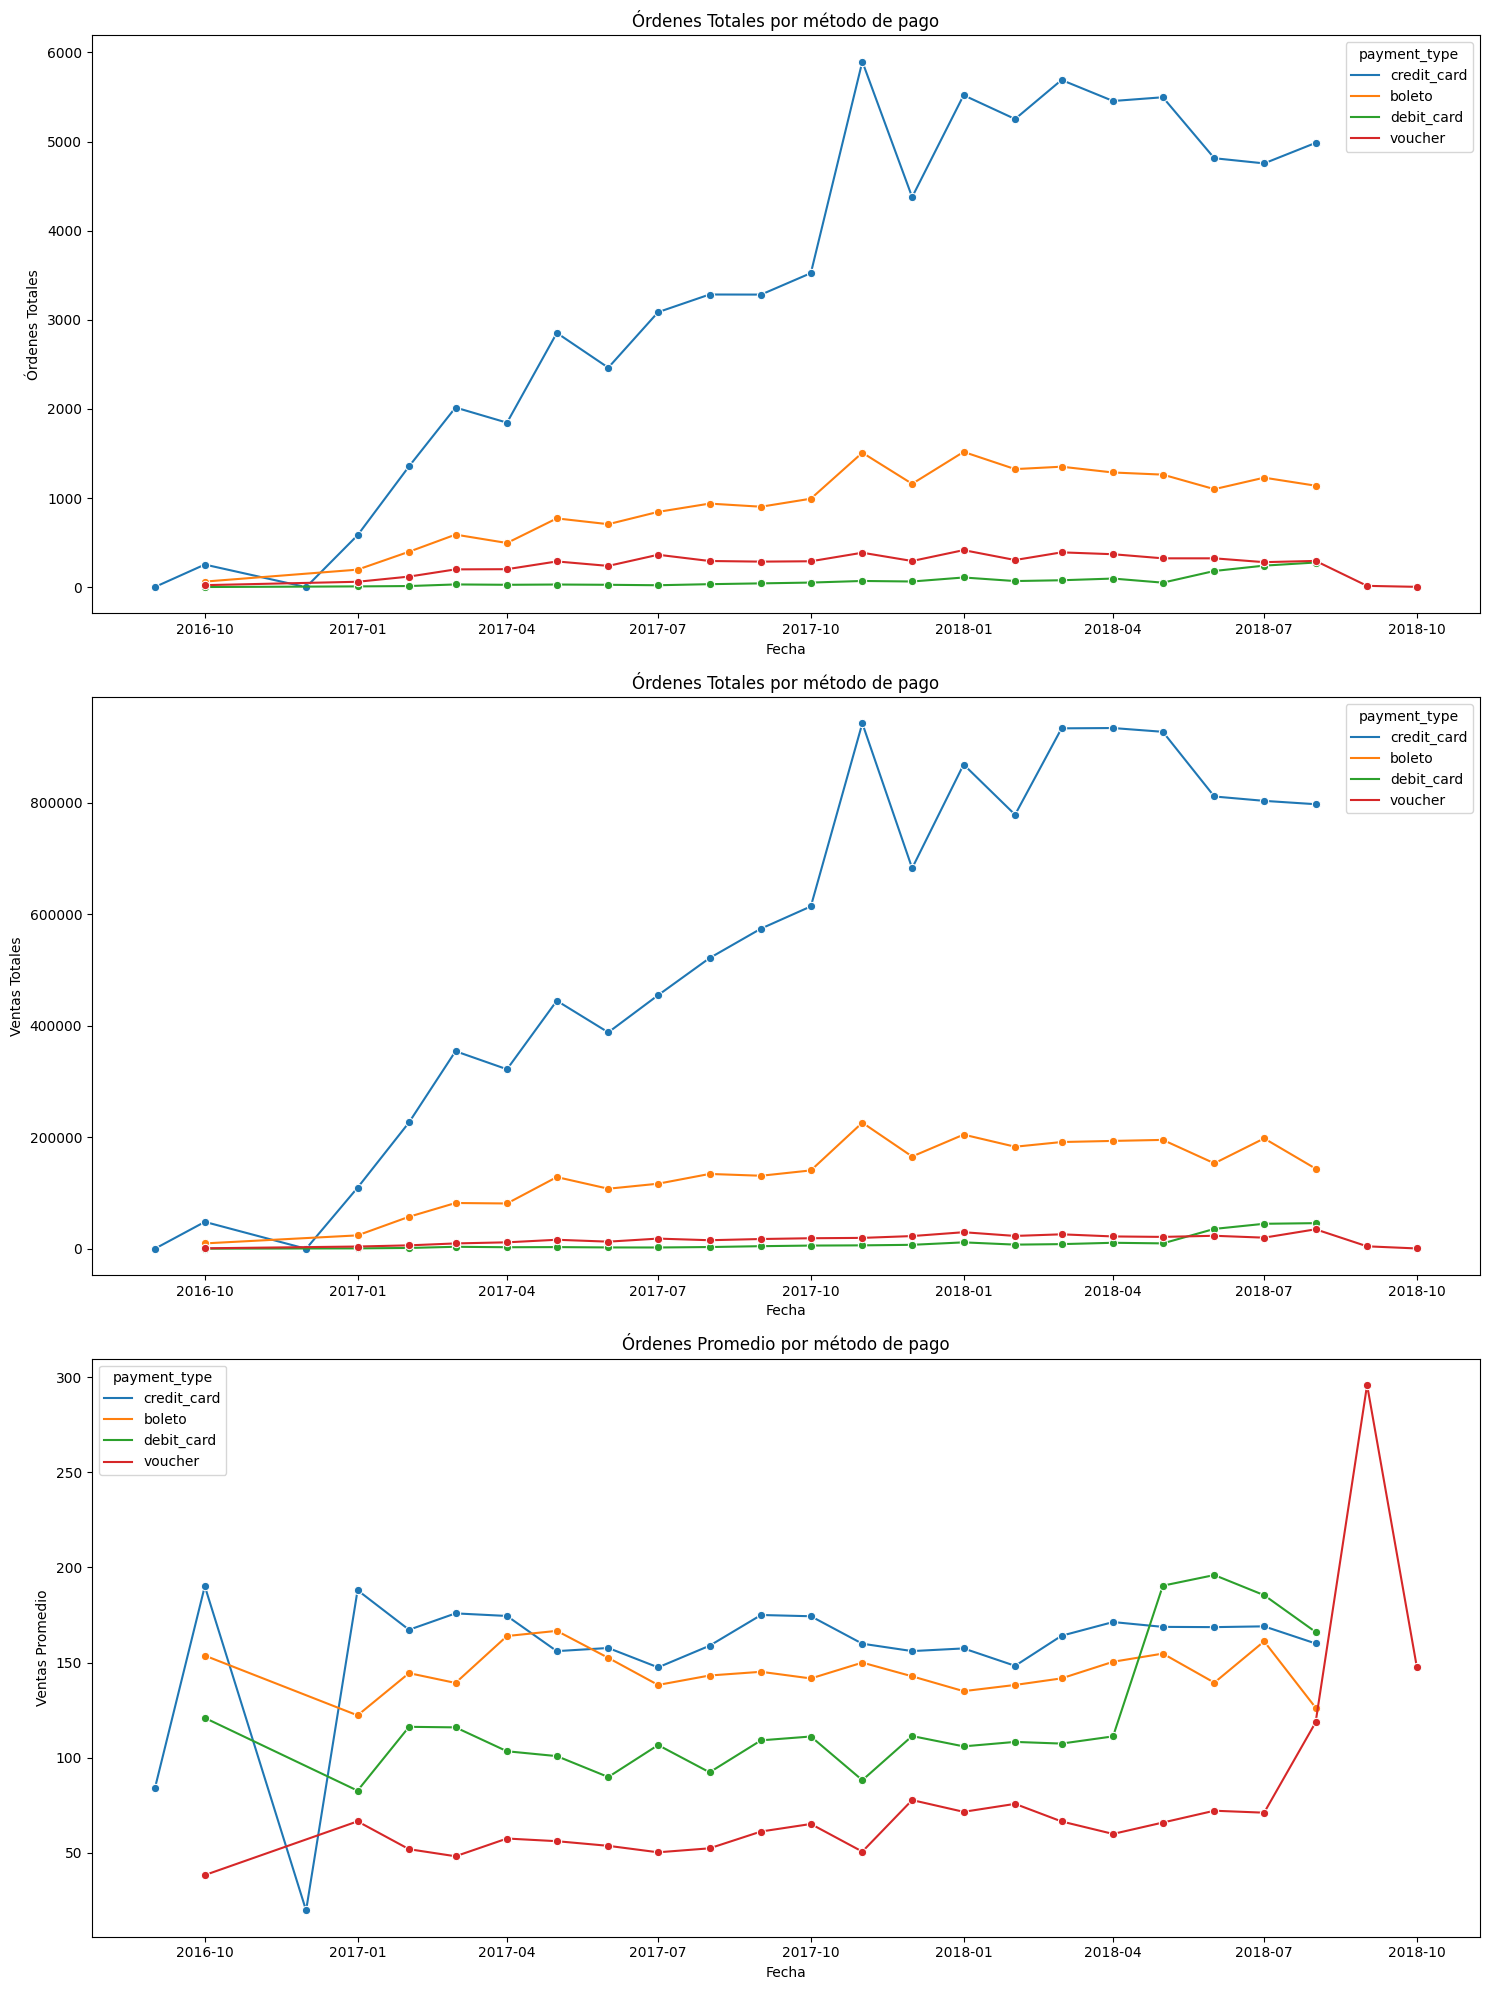

In [51]:

# Crear una columna de fecha única
df_query_E['date'] = df_query_E['Year'].astype(str) + '-' + df_query_E['Month'].astype(str).str.zfill(2)
df_query_E['date'] = pd.to_datetime(df_query_E['date'], format='%Y-%m')

# Configurar la figura y los ejes
fig, axs = plt.subplots(3, 1, figsize=(15, 20))

# Total Orders
sns.lineplot(x='date', y='Total_Orders', hue='payment_type', data=df_query_E, marker='o', ax=axs[0])
axs[0].set_title('Órdenes Totales por método de pago')
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Órdenes Totales')

# Total Sales
sns.lineplot(x='date', y='Total_Sales', hue='payment_type', data=df_query_E, marker='o', ax=axs[1])
axs[1].set_title('Órdenes Totales por método de pago')
axs[1].set_xlabel('Fecha')
axs[1].set_ylabel('Ventas Totales')

# Avg Sales
sns.lineplot(x='date', y='Avg_Sales', hue='payment_type', data=df_query_E, marker='o', ax=axs[2])
axs[2].set_title('Órdenes Promedio por método de pago')
axs[2].set_xlabel('Fecha')
axs[2].set_ylabel('Ventas Promedio')

plt.tight_layout()
plt.show()


## BBT2-70 Querys en spark SQL, análisis F

Calcular la distancia de los clientes de su vecino mas cercano sacando luego el promedio de distancia por ciudad.

In [52]:
#Usamos la función LEAD() para obtener las coordenadas del próximo cliente en la misma ciudad. Con estas coordenadas, calculamos la distancia "recta" entre dos puntos (clientes vecinos).

#La query se guarda como resultado en un nuevo df
dfs_query_F = spark.sql("""
SELECT
  geolocation_city,
  AVG(sqrt(pow(lead_Latitud - Latitud, 2) + pow(lead_Longitud - Longitud, 2))) AS avg_distance
FROM (
  SELECT *,
    LEAD(Latitud) OVER (PARTITION BY geolocation_city ORDER BY Latitud, Longitud) AS lead_Latitud,
    LEAD(Longitud) OVER (PARTITION BY geolocation_city ORDER BY Latitud, Longitud) AS lead_Longitud
  FROM vt_Analysis_F
) t
GROUP BY geolocation_city
ORDER BY avg_distance DESC""")

#Mostramos resultado
dfs_query_F.show()


+------------------+------------------+
|  geolocation_city|      avg_distance|
+------------------+------------------+
|   santa terezinha| 23.08980556019126|
|      monte alegre|19.173174820558735|
|          belmonte|  18.3507211863468|
|      alto paraiso|16.798499703074523|
|sao jose do divino|14.675541335795552|
|   jequia da praia|12.676659842644376|
|        sitio novo|10.791132676633016|
|          laranjal| 10.60690634669008|
| presidente medici| 9.163580471596543|
|           colinas|  8.18997514151013|
|            bonfim| 7.112013602400816|
|      campo alegre| 6.969765944545375|
|          jandaira| 6.424919459992121|
|        guaraciaba| 6.058431836641606|
|           araruna| 6.038462413953963|
|            itambé| 5.856852398328138|
|            aurora| 5.749034245345539|
|            jardim| 5.464995310255761|
|     monte castelo| 5.331943095757441|
|sao vicente ferrer| 5.252071542090701|
+------------------+------------------+
only showing top 20 rows



## BBT2-87 Creación de visualización para Análisis F

In [53]:
#Creamos df de pandas con la query de la vista temporal F (para poder graficar)
df_avg_distance = dfs_query_F.toPandas()


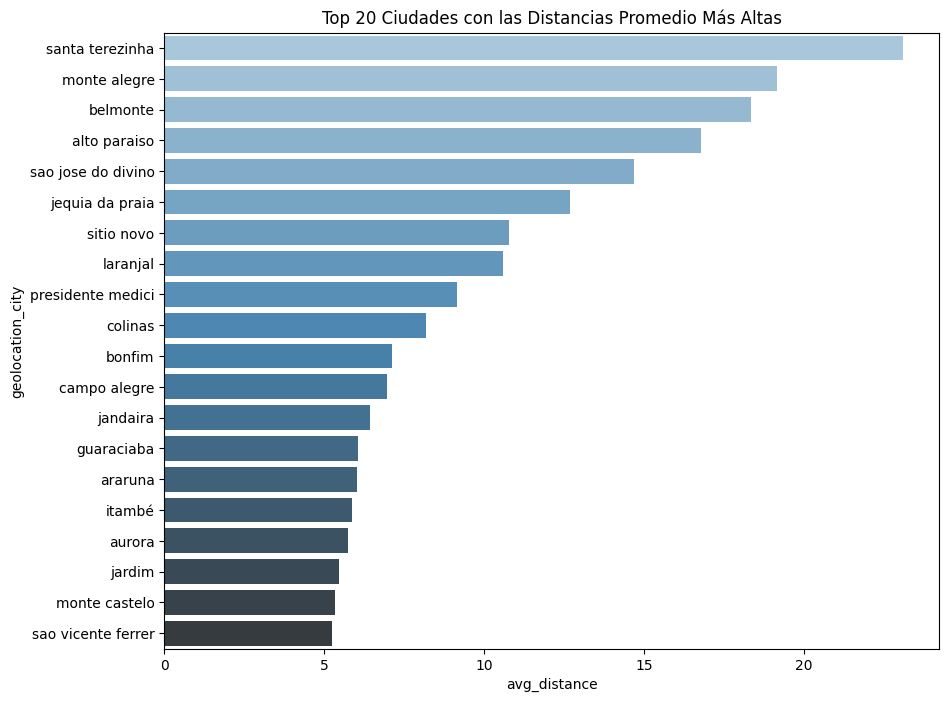

In [54]:
#Graficamos las 20 ciudades con las distancias promedio más altas
top_20 = df_avg_distance.nlargest(20, 'avg_distance')
plt.figure(figsize=(10,8))
sns.barplot(data=top_20, x='avg_distance', y='geolocation_city', palette='Blues_d')
plt.title('Top 20 Ciudades con las Distancias Promedio Más Altas')
plt.show()

## BBT2-71 Querys en spark SQL, análisis G

Calcular el monto máximo, mínimo y promedio de compra por ciudad, año y mes de compra.

In [55]:
#La query se guarda como resultado en un nuevo df
dfs_query_G = spark.sql("""
SELECT
    geolocation_city,
    YEAR(Time) as purchase_year,
    MONTH(Time) as purchase_month,
    MAX(payment_value) as max_order_value,
    MIN(payment_value) as min_order_value,
    AVG(payment_value) as avg_order_value
FROM vt_Analysis_G
GROUP BY geolocation_city, purchase_year, purchase_month
ORDER BY avg_order_value DESC;
""")

#Mostramos resultado
dfs_query_G.show()

+--------------------+-------------+--------------+---------------+---------------+---------------+
|    geolocation_city|purchase_year|purchase_month|max_order_value|min_order_value|avg_order_value|
+--------------------+-------------+--------------+---------------+---------------+---------------+
|  bom jesus do galho|         2018|             3|        4175.26|        4175.26|        4175.26|
|          mandaguacu|         2017|             5|         2827.0|         2827.0|         2827.0|
|              gurupi|         2017|             6|        2784.16|        2784.16|        2784.16|
|        porto seguro|         2018|             5|        2759.95|        2759.95|        2759.95|
|             ipanema|         2017|            11|        2759.88|        2759.88|        2759.88|
|            pacatuba|         2017|             6|        2734.11|        2734.11|        2734.11|
|           ibotirama|         2017|            12|        2732.06|        2732.06|        2732.06|


## BBT2-88 Creación de visualización para Análisis G (parte 1)

In [56]:
#Creamos df de pandas con la query de la vista temporal G (para poder graficar)
df_values_time = dfs_query_G.toPandas()

In [57]:
#Creamos un df plano de resultados para crear un mapa de calor mostrando el AVG para año y mes
result_G = df_values_time.groupby(['purchase_year', 'purchase_month'])['avg_order_value'].mean().reset_index()

# Mostrar el resultado
# print(result_G)


<ipython-input-58-8ee026dffb1f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = result_G.pivot("purchase_month", "purchase_year", "avg_order_value")


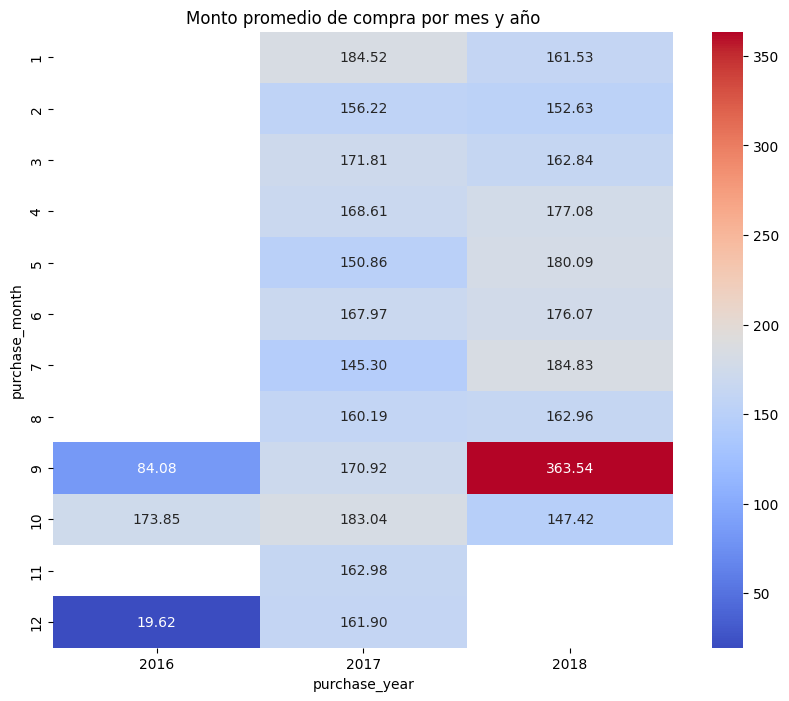

In [58]:

# Crear una tabla pivot (dinámica) para hacer un heatmap del monto promedio de compra por mes y año
pivot_table = result_G.pivot("purchase_month", "purchase_year", "avg_order_value")

# Graficamos
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Monto promedio de compra por mes y año')
plt.show()

In [59]:
#Agregamos una consulta adicional para graficar las ciudades con los mayores promedios de compra
#La query se guarda como resultado en un nuevo df
dfs_query_G1 = spark.sql("""
SELECT
    geolocation_city,
    YEAR(Time) as purchase_year,
    MONTH(Time) as purchase_month,
    AVG(payment_value) as avg_order_value
FROM vt_Analysis_G
GROUP BY purchase_year, geolocation_city, purchase_month
HAVING avg_order_value > 2500
ORDER BY avg_order_value DESC, purchase_year DESC;
""")

#Mostramos resultado
dfs_query_G1.show()

+------------------+-------------+--------------+---------------+
|  geolocation_city|purchase_year|purchase_month|avg_order_value|
+------------------+-------------+--------------+---------------+
|bom jesus do galho|         2018|             3|        4175.26|
|        mandaguacu|         2017|             5|         2827.0|
|            gurupi|         2017|             6|        2784.16|
|      porto seguro|         2018|             5|        2759.95|
|           ipanema|         2017|            11|        2759.88|
|          pacatuba|         2017|             6|        2734.11|
|         ibotirama|         2017|            12|        2732.06|
|      martinopolis|         2018|             5|        2638.64|
+------------------+-------------+--------------+---------------+



## BBT2-88 Creación de visualización para Análisis G (parte 2)

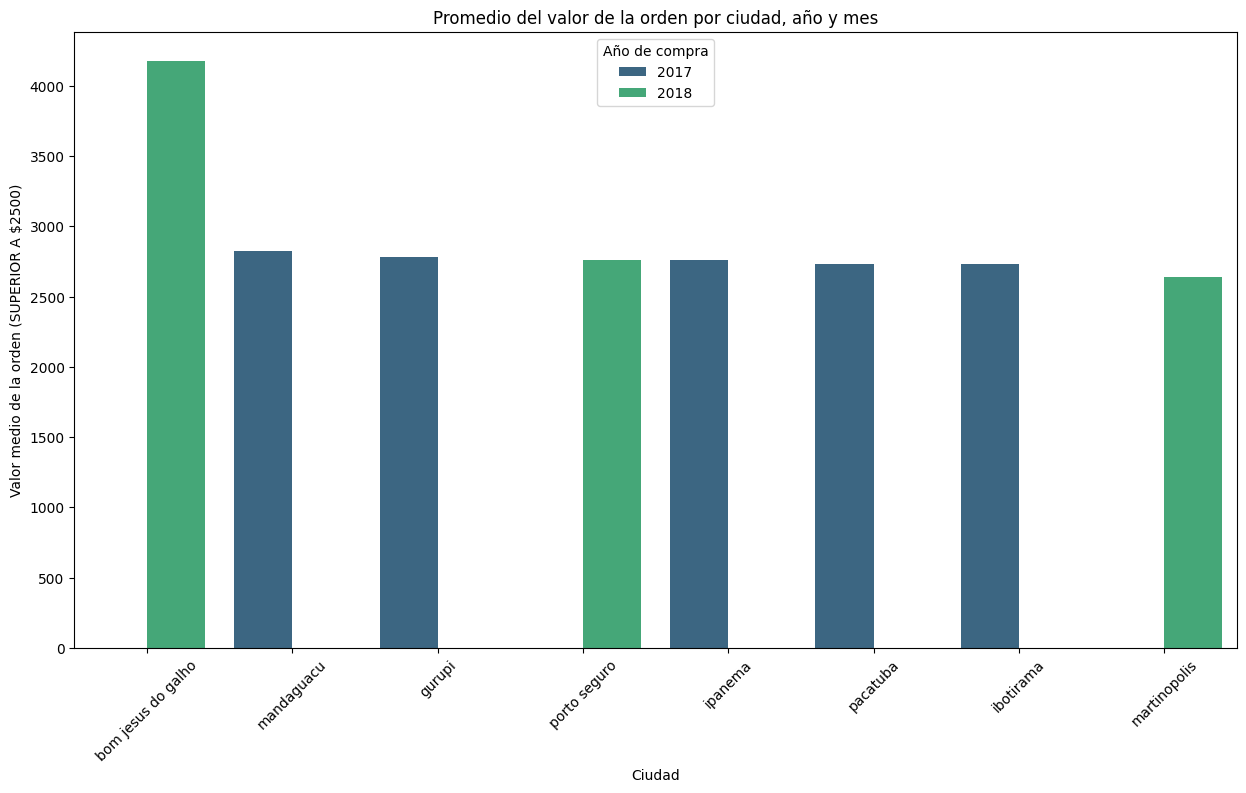

In [60]:
#GUardamos en df de pandas para poder graficar
df_query_G1 = dfs_query_G1.toPandas()

plt.figure(figsize=(15, 8))

sns.barplot(x='geolocation_city', y='avg_order_value', hue='purchase_year', data=df_query_G1, errorbar=None, palette="viridis")
plt.title('Promedio del valor de la orden por ciudad, año y mes')
plt.xlabel('Ciudad')
plt.ylabel('Valor medio de la orden (SUPERIOR A $2500)')
plt.xticks(rotation=45)
plt.legend(title='Año de compra')

plt.show()

## BBT2-72 Querys en spark SQL, análisis H

Calcular el puntaje máximo, mínimo, promedio de compra y de las órdenes agrupadas por año, mes.


In [61]:
#La query se guarda como resultado en un nuevo df
dfs_query_H = spark.sql("""
SELECT
    YEAR(order_purchase_timestamp) as purchase_year,
    MONTH(order_purchase_timestamp) as purchase_month,
    MAX(review_score) as max_score,
    MIN(review_score) as min_score,
    ROUND(AVG(review_score) , 2) as avg_score
FROM vt_Analysis_H
WHERE order_purchase_timestamp IS NOT NULL AND review_score IS NOT NULL
GROUP BY purchase_year, purchase_month
HAVING purchase_year IS NOT NULL AND purchase_month IS NOT NULL
ORDER BY purchase_year DESC, purchase_month
""")
#Mostramos los resultados
dfs_query_H.show()

+-------------+--------------+---------+---------+---------+
|purchase_year|purchase_month|max_score|min_score|avg_score|
+-------------+--------------+---------+---------+---------+
|         2018|             1|        5|        1|     4.04|
|         2018|             2|        5|        1|     3.83|
|         2018|             3|        5|        1|     3.75|
|         2018|             4|        5|        1|     4.16|
|         2018|             5|        5|        1|     4.19|
|         2018|             6|        5|        1|     4.28|
|         2018|             7|        5|        1|     4.26|
|         2018|             8|        5|        1|     4.26|
|         2018|             9|        5|        1|      1.8|
|         2018|            10|        5|        1|     2.25|
|         2017|             1|        5|        1|     4.07|
|         2017|             2|        5|        1|     4.02|
|         2017|             3|        5|        1|     4.07|
|         2017|         

## BBT2-89 Creación de visualización para Análisis H

In [62]:
#GUardamos en df de pandas para poder graficar
df_query_H = dfs_query_H.toPandas()

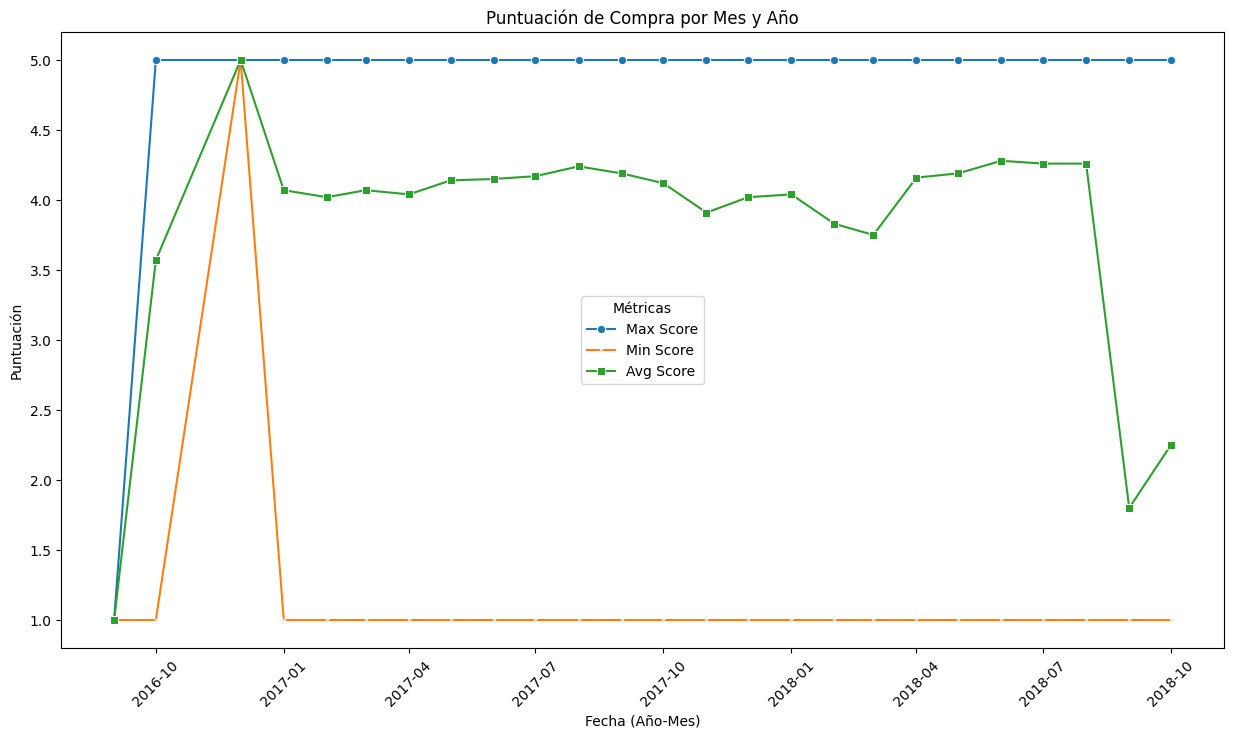

In [63]:
# Convertimon la columna de fecha en string que junte año y mes
df_query_H['date'] = df_query_H['purchase_year'].astype(str) + '-' + df_query_H['purchase_month'].astype(str).str.zfill(2)
df_query_H['date'] = pd.to_datetime(df_query_H['date'], format='%Y-%m')

#Graficamos
plt.figure(figsize=(15, 8))

sns.lineplot(x='date', y='max_score', data=df_query_H, label='Max Score', marker='o')
sns.lineplot(x='date', y='min_score', data=df_query_H, label='Min Score', marker='x')
sns.lineplot(x='date', y='avg_score', data=df_query_H, label='Avg Score', marker='s')

plt.title('Puntuación de Compra por Mes y Año')
plt.xlabel('Fecha (Año-Mes)')
plt.ylabel('Puntuación')
plt.legend(title='Métricas')
plt.xticks(rotation=45)


plt.show()


## BBT2-79 Carga de datos, generacion de archivos .parquet de análisis E

In [ ]:
# Ruta donde se guardarán los resultados Parquet
ruta_resultados_E = "Results_Parquets/Analysis_E/"

# Guardar dfs_query_E como Parquet
dfs_query_E.write.parquet(ruta_resultados_E + "/dfs_query_E.parquet")

In [65]:
# Leer el archivo Parquet guardado
dfs_query_E_check = spark.read.parquet(ruta_resultados_E + "/dfs_query_E.parquet")

# Mostrar algunas filas para verificar el contenido
dfs_query_E_check.show()

+----+-----+------------+------------+-----------+---------+
|Year|Month|payment_type|Total_Orders|Total_Sales|Avg_Sales|
+----+-----+------------+------------+-----------+---------+
|2017|   11| credit_card|        5897|  942856.67|   159.89|
|2018|    4| credit_card|        5455|   934306.0|   171.28|
|2018|    3| credit_card|        5691|   933770.1|   164.08|
|2018|    5| credit_card|        5497|  927556.35|   168.74|
|2018|    1| credit_card|        5520|  868880.38|   157.41|
|2018|    6| credit_card|        4813|  811508.56|   168.61|
|2018|    7| credit_card|        4755|  803674.49|   169.02|
|2018|    8| credit_card|        4985|  797648.89|   160.01|
|2018|    2| credit_card|        5253|   778803.0|   148.26|
|2017|   12| credit_card|        4377|  682859.59|   156.01|
|2017|   10| credit_card|        3524|  614327.89|   174.33|
|2017|    9| credit_card|        3283|  574484.15|   174.99|
|2017|    8| credit_card|        3284|  521595.69|   158.83|
|2017|    7| credit_card

## BBT2-80 Carga de datos, generacion de archivos .parquet de análisis F

In [ ]:
# Ruta donde se guardarán los resultados Parquet
ruta_resultados_F = "Results_Parquets/Analysis_F/"

# Guardar dfs_query_F como Parquet
dfs_query_F.write.parquet(ruta_resultados_F + "/dfs_query_F.parquet")

In [68]:
# Leer el archivo Parquet guardado
dfs_query_F_check = spark.read.parquet(ruta_resultados_F + "/dfs_query_F.parquet")

# Mostrar algunas filas para verificar el contenido
dfs_query_F_check.show()

+------------------+------------------+
|  geolocation_city|      avg_distance|
+------------------+------------------+
|   santa terezinha| 23.08980556019126|
|      monte alegre|19.173174820558735|
|          belmonte|  18.3507211863468|
|      alto paraiso|16.798499703074523|
|sao jose do divino|14.675541335795552|
|   jequia da praia|12.676659842644376|
|        sitio novo|10.791132676633016|
|          laranjal| 10.60690634669008|
| presidente medici| 9.163580471596543|
|           colinas|  8.18997514151013|
|            bonfim| 7.112013602400816|
|      campo alegre| 6.969765944545375|
|          jandaira| 6.424919459992121|
|        guaraciaba| 6.058431836641606|
|           araruna| 6.038462413953963|
|            itambé| 5.856852398328138|
|            aurora| 5.749034245345539|
|            jardim| 5.464995310255761|
|     monte castelo| 5.331943095757441|
|sao vicente ferrer| 5.252071542090701|
+------------------+------------------+
only showing top 20 rows



## BBT2-81 Carga de datos, generacion de archivos .parquet de análisis G

In [69]:
# Ruta donde se guardarán los resultados Parquet
ruta_resultados_G = "Results_Parquets/Analysis_G/"

# Guardar dfs_query_G como Parquet
dfs_query_G.write.parquet(ruta_resultados_G + "/dfs_query_G.parquet")

In [70]:
# Leer el archivo Parquet guardado
dfs_query_G_check = spark.read.parquet(ruta_resultados_G + "/dfs_query_G.parquet")

# Mostrar algunas filas para verificar el contenido
dfs_query_G_check.show()

+--------------------+-------------+--------------+---------------+---------------+---------------+
|    geolocation_city|purchase_year|purchase_month|max_order_value|min_order_value|avg_order_value|
+--------------------+-------------+--------------+---------------+---------------+---------------+
|  bom jesus do galho|         2018|             3|        4175.26|        4175.26|        4175.26|
|          mandaguacu|         2017|             5|         2827.0|         2827.0|         2827.0|
|              gurupi|         2017|             6|        2784.16|        2784.16|        2784.16|
|        porto seguro|         2018|             5|        2759.95|        2759.95|        2759.95|
|             ipanema|         2017|            11|        2759.88|        2759.88|        2759.88|
|            pacatuba|         2017|             6|        2734.11|        2734.11|        2734.11|
|           ibotirama|         2017|            12|        2732.06|        2732.06|        2732.06|


## BBT2-82 Carga de datos, generacion de archivos .parquet de análisis H

In [71]:
# Ruta donde se guardarán los resultados Parquet
ruta_resultados_H = "Results_Parquets/Analysis_H/"

# Guardar dfs_query_H como Parquet
dfs_query_H.write.parquet(ruta_resultados_H + "/dfs_query_H.parquet")



In [72]:
# Leer el archivo Parquet guardado
dfs_query_H_check = spark.read.parquet(ruta_resultados_H + "/dfs_query_H.parquet")

# Mostrar algunas filas para verificar el contenido
dfs_query_H_check.show()


+-------------+--------------+---------+---------+---------+
|purchase_year|purchase_month|max_score|min_score|avg_score|
+-------------+--------------+---------+---------+---------+
|         2018|             1|        5|        1|     4.04|
|         2018|             2|        5|        1|     3.83|
|         2018|             3|        5|        1|     3.75|
|         2018|             4|        5|        1|     4.16|
|         2018|             5|        5|        1|     4.19|
|         2018|             6|        5|        1|     4.28|
|         2018|             7|        5|        1|     4.26|
|         2018|             8|        5|        1|     4.26|
|         2018|             9|        5|        1|      1.8|
|         2018|            10|        5|        1|     2.25|
|         2017|             1|        5|        1|     4.07|
|         2017|             2|        5|        1|     4.02|
|         2017|             3|        5|        1|     4.07|
|         2017|         